<a href="https://colab.research.google.com/github/VineetGp/Images/blob/main/HW2_21566020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AID 565 Computer Vision Assignment 02

**Name**: Vineet Gupta

**Roll No** : 21566020


**Q.1** Load a pretrained model and print weights of any one layer of the model

In [3]:
import torch
from torchvision import models

In [4]:
vgg = models.vgg16(pretrained=True)
print(vgg)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
#printing weights of layer 0
print(vgg.features[0].weight)

Parameter containing:
tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[ 1.7715e-01,  5.2149e-01,  9.8740

**Q.2** Observe the difference between normal and group convolutions. Also try depthwise convolutions, where groups=in_channels

In [6]:
import torch.nn as nn

In [7]:
#Normal Convolution
conv = nn.Conv2d(
    in_channels=500,
    out_channels = 10,
    kernel_size = 3,
    stride = 1,
    padding= 'same',
    groups = 1
)
print(conv.weight.shape)

torch.Size([10, 500, 3, 3])


In [8]:
#Group convolution with group size = 2
conv = nn.Conv2d(
    in_channels=500,
    out_channels = 10,
    kernel_size = 3,
    stride = 1,
    padding= 'same' ,
    groups = 10
)
print(conv.weight.shape)

torch.Size([10, 50, 3, 3])


In [9]:
conv = nn.Conv2d(
    in_channels=500,
    out_channels = 500,
    kernel_size = 3,
    stride = 1,
    padding= 1 ,
    groups = 500
)
print(conv.weight.shape)

torch.Size([500, 1, 3, 3])


**Q.3** Load a pretrained model and perform transfer learning on it.

In [10]:
from __future__ import print_function, division
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import copy
import time
import os


plt.ion()

In [11]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2022-01-26 16:54:18--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.224.154.14, 13.224.154.24, 13.224.154.106, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.224.154.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  59.9MB/s    in 0.8s    

2022-01-26 16:54:19 (59.9 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [12]:
!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [13]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.455, 0.465, 0.406], [0.239, 0.234, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.455, 0.465, 0.406], [0.239, 0.234, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


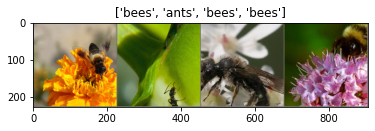

In [14]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.455, 0.465, 0.406])
    std = np.array([0.239, 0.234, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [15]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=24):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [16]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [17]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [18]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.5269 Acc: 0.7172
val Loss: 0.2585 Acc: 0.9216

Epoch 1/9
----------
train Loss: 0.4021 Acc: 0.8402
val Loss: 0.2432 Acc: 0.9216

Epoch 2/9
----------
train Loss: 0.5028 Acc: 0.8074
val Loss: 0.3285 Acc: 0.8824

Epoch 3/9
----------
train Loss: 0.4966 Acc: 0.7869
val Loss: 0.1779 Acc: 0.9542

Epoch 4/9
----------
train Loss: 0.3980 Acc: 0.8156
val Loss: 0.2078 Acc: 0.9346

Epoch 5/9
----------
train Loss: 0.4130 Acc: 0.8320
val Loss: 0.1748 Acc: 0.9477

Epoch 6/9
----------
train Loss: 0.4847 Acc: 0.8197
val Loss: 0.1665 Acc: 0.9412

Epoch 7/9
----------
train Loss: 0.4297 Acc: 0.8074
val Loss: 0.1739 Acc: 0.9281

Epoch 8/9
----------
train Loss: 0.3558 Acc: 0.8730
val Loss: 0.1754 Acc: 0.9346

Epoch 9/9
----------
train Loss: 0.3152 Acc: 0.8525
val Loss: 0.1731 Acc: 0.9346

Training complete in 0m 45s
Best val Acc: 0.954248


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


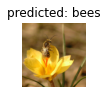

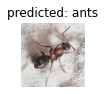

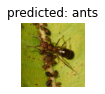

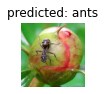

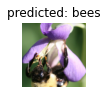

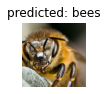

In [19]:
visualize_model(model_conv)

plt.ioff()
plt.show()

**Q.4** Use gradCAM to visualise intermediate activations in a model

In [20]:
!git clone https://github.com/yaleCat/Grad-CAM-pytorch.git
!mv Grad-CAM-pytorch/assets/ /content/
!mv Grad-CAM-pytorch/grad_cam.py /content/
!rm -rf Grad-CAM-pytorch/
!pip install --upgrade efficientnet-pytorch

Cloning into 'Grad-CAM-pytorch'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 30 (delta 2), reused 23 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), done.
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=38fc3adbc788160ef1817626a7dba4c05dab26a779a7723b529ea9ae3cf11493
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [21]:
import sys
sys.path.append('/')
import cv2
from efficientnet_pytorch import EfficientNet
from grad_cam import GradCam,GuidedBackpropReLUModel,show_cams,show_gbs,preprocess_image

In [22]:
model = models.vgg19(pretrained=True)
grad_cam = GradCam(model=model, blob_name = 'features', target_layer_names=['4','20','36'], use_cuda=False)
img = cv2.imread('./assets/dog.jpg', 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inputs = preprocess_image(img)
# If None, returns the map for the highest scoring category.
# Otherwise, targets the requested index.
target_index = None
mask_dic = grad_cam(inputs, target_index)
show_cams(img, mask_dic)
gb_model = GuidedBackpropReLUModel(model=model, activation_layer_name = 'ReLU', use_cuda=False)
show_gbs(inputs, gb_model, target_index, mask_dic)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

**Q.5** Replace the ReLUs in the code with sigmoid units, and compare the training
and testing accuracies of both the models. Discuss the results**

In [24]:
import tensorflow as tf
import pandas as pd

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [26]:
train_images.shape

(60000, 28, 28)

In [28]:
train_images = train_images / 255.0

test_images = test_images / 255.0    

In [32]:
early_cb = tf.keras.callbacks.EarlyStopping(monitor = "loss" ,patience = 3, restore_best_weights = True)

In [33]:
epoch = 100
optimizer = tf.optimizers.SGD(0.01)
LOSS = tf.losses.sparse_categorical_crossentropy

In [34]:
from gc import callbacks
def Model(activation):
  LAYERS = [
            tf.keras.layers.Conv2D(32, (5,5), padding='same', activation=activation, input_shape=(28,28,1)),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=activation),
            tf.keras.layers.MaxPool2D(strides=(2,2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=activation),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes, activation='softmax')
            ]
  model = tf.keras.models.Sequential(LAYERS)

  model.compile(optimizer = optimizer,
              loss = LOSS,
              metrics=['accuracy'])
  
  history = model.fit(train_images, train_labels, epochs = epoch, callbacks = [early_cb])

  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f'\nTest accuracy with {activation}:', test_acc)

  pd.DataFrame(history.history).plot(figsize=(10,7))
  plt.grid('True')
  plt.title(f"Accuracy and loss with {activation}") 

Epoch 1/100
1875/1875 [==============================] - 25s 6ms/step - loss: 2.3201 - accuracy: 0.1007
Epoch 2/100
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3035 - accuracy: 0.1015
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3032 - accuracy: 0.1029
Epoch 4/100
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3030 - accuracy: 0.1012
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.1017
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3024 - accuracy: 0.1023
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3025 - accuracy: 0.1025
Epoch 8/100
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3024 - accuracy: 0.1020
Epoch 9/100
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3022 - accuracy: 0.1032
Epoch 10/100
1875/1875 [==============================] - 12s 6m

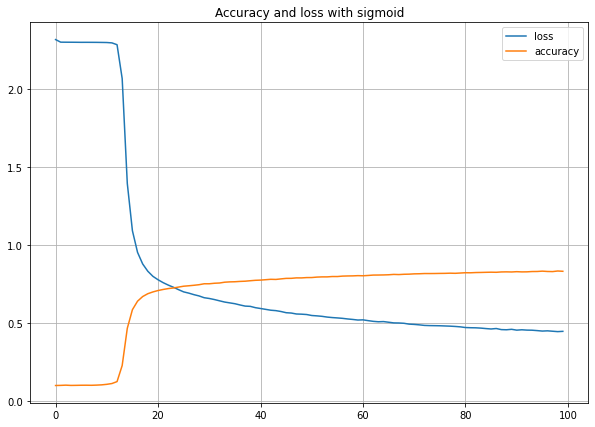

In [36]:
Model("sigmoid")

Epoch 1/100
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0040 - accuracy: 0.6248
Epoch 2/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6479 - accuracy: 0.7548
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5766 - accuracy: 0.7851
Epoch 4/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5351 - accuracy: 0.8024
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5056 - accuracy: 0.8141
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4789 - accuracy: 0.8245
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4607 - accuracy: 0.8312
Epoch 8/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4461 - accuracy: 0.8382
Epoch 9/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4298 - accuracy: 0.8444
Epoch 10/100
1875/1875 [==============================] - 12s 6m

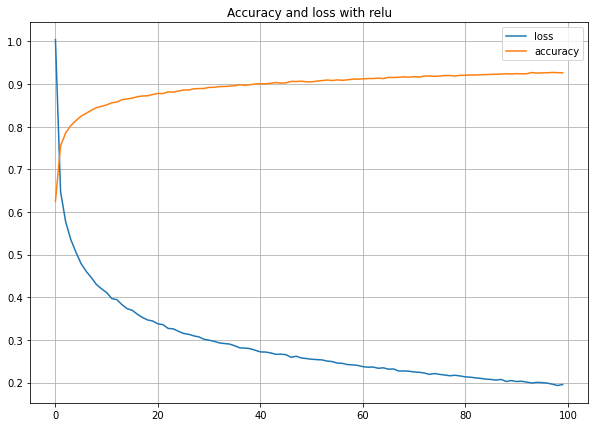

In [37]:
Model("relu")

**RELU**
Test accuracy: 0.925599992275238

**SIGMOID**
Test accuracy: 0.8486999869346619

We can see that relu gives much better accuracy than sigmoid. It is because relu is more computationally efficient to compute than Sigmoid like functions since relu just needs to pick max(0,x) and not perform expensive exponential operations as in sigmoids. Also the derivative of relu is either 0 or 1 which is much simpler than derivative of sigmoids. That's why relu shows better convergence than sigmoid.
